In [112]:
import pandas as pd
import numpy as np
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [113]:
df=pd.read_csv(r"C:\Users\aniket gautam\CCPP\CCPP\data.csv")

In [114]:
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


In [115]:
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [116]:
y=df['PE']
del df['PE']
X_train, X_test, y_train, y_test = train_test_split(
df, y, test_size=0.33, random_state=42)

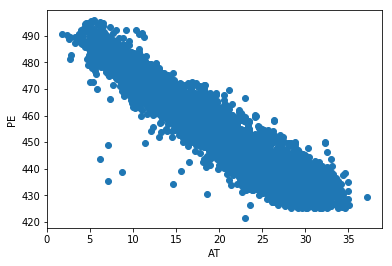

In [128]:
plt.scatter(X_train['AT'],y_train)
plt.xlabel('AT')
plt.ylabel('PE')
plt.show()

ValueError: x and y must be the same size

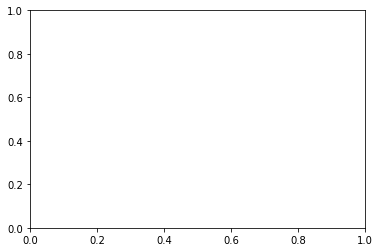

In [129]:
plt.scatter(df['AP'],y)
plt.xlabel('AP')
plt.ylabel('PE')
plt.show()

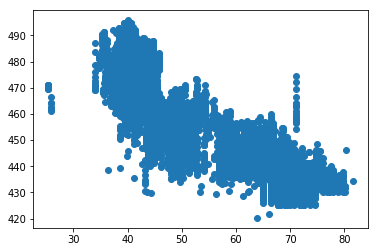

In [119]:
plt.scatter(df['V'],y)
plt.xlabel('V')
plt.ylabel('PE')
plt.show()

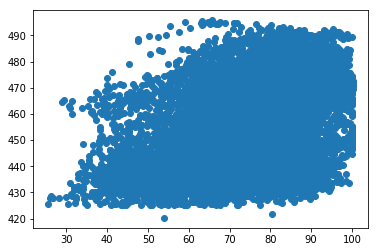

In [120]:
plt.scatter(df['RH'],y)

In [121]:
B=[]
n=len(df['V'])
for col in df.columns:
    a,b,c,d=np.sum(np.multiply(df[col],y)),n*np.mean(df[col])*np.mean(y),np.sum(np.square(df[col])),n*(np.square(np.mean(df[col])))
    b1=(a-b)/(c-d)
    b0=np.mean(y)- np.mean(df[col])*b1
    B.append([b1,b0])

In [122]:
error=[0]*4
y_test=list(y_test)
y_pred=[]
for i in range(4):
    y_pred.append([])
for i in range(len(X_test)):
    j=0
    for col in X_test.columns:
        y=0
        y=X_test.iloc[i][j]*B[j][0]+ B[j][1]
        y_pred[j].append(y)
        error[j]+=(y-y_test[i])**2
        j+=1
for i in range(len(error)):
    error[i]=(error[i]**0.5)/len(y_test)


In [123]:
print ("Error:",error)

Error: [0.09578780003760966, 0.15018318130361868, 0.26069855140959103, 0.2794541823747263]


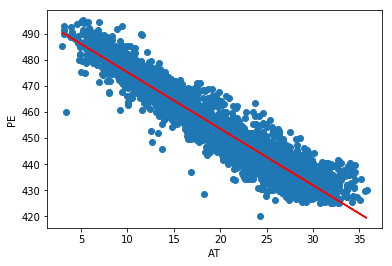

In [124]:
plt.scatter(X_test['AT'],y_test)
plt.plot(X_test['AT'],y_pred[0],c='r')
plt.xlabel('AT')
plt.ylabel('PE')
plt.show()

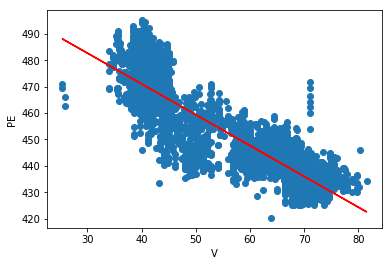

In [125]:
plt.scatter(X_test['V'],y_test)
plt.plot(X_test['V'],y_pred[1],c='r')
plt.xlabel('V')
plt.ylabel('PE')
plt.show()

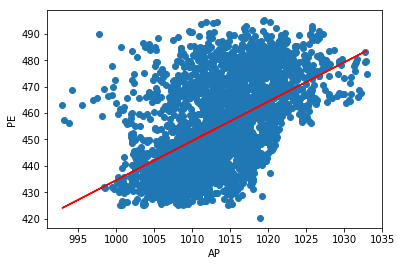

In [126]:
plt.scatter(X_test['AP'],y_test)
plt.plot(X_test['AP'],y_pred[2],c='r')
plt.xlabel('AP')
plt.ylabel('PE')
plt.show()


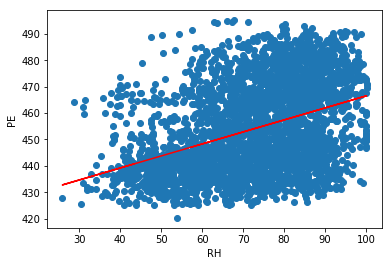

In [127]:
plt.scatter(X_test['RH'],y_test)
plt.plot(X_test['RH'],y_pred[3],c='r')
plt.xlabel('RH')
plt.ylabel('PE')
plt.show()